In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv("data limpia/X_definitiva.csv")
Y=pd.read_csv("data limpia/Y_definitiva.csv")
Y=Y["Precio"]
Z_test=pd.read_csv("data limpia/Z_test_definitiva.csv")

In [4]:
data=X.copy()
data["Price"]=Y

In [5]:
data

,id,Inches,Weight,marca_1_19,typename_1_6,screensize_1_15,screeninfo_1_20,ram_1_13,memory_1_36,opsys_1_9,procesador_marca_1_2,procesador_modelo_1_13,procesador_rendimiento_1_25,gpu_marca_1_3,gpu_modelo_1_10,Price
0,1,125,1.20,8,3,6,9,2,6,2,2,11,10,2,5,669.00
1,2,173,3.20,8,5,6,5,4,29,5,1,12,21,2,5,1695.00
2,3,156,1.85,6,2,6,5,2,11,5,2,11,17,2,5,779.00
3,4,133,1.29,9,4,9,13,6,27,5,2,11,15,2,5,2240.00
4,5,156,2.32,6,2,6,5,2,13,9,2,11,15,2,5,825.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,908,156,2.18,9,2,3,1,2,11,5,2,11,15,3,7,684.99
908,909,156,2.40,6,2,6,5,3,11,5,1,9,11,1,3,499.00
909,910,156,2.20,15,5,6,5,4,19,5,2,11,15,1,3,1119.91
910,911,156,2.19,6,2,3,1,2,9,5,1,5,6,1,3,298.00


<AxesSubplot:>

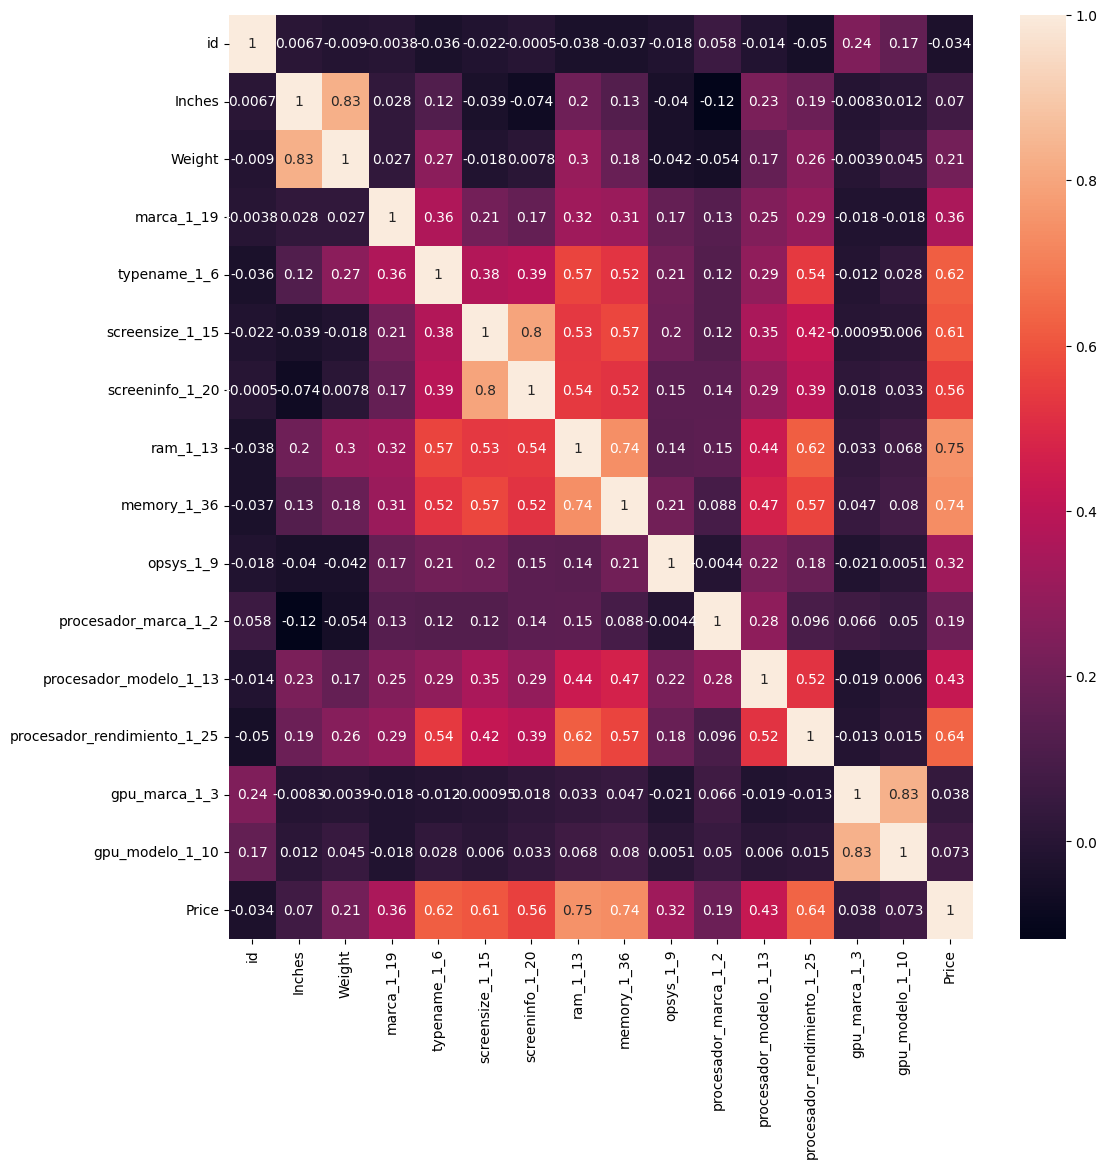

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

In [8]:
data.drop(columns={"Inches","screeninfo_1_20","memory_1_36","procesador_modelo_1_13","gpu_marca_1_3","gpu_modelo_1_10"},inplace=True)

In [23]:
Z_test.drop(columns={"Inches","screeninfo_1_20","memory_1_36","procesador_modelo_1_13","gpu_marca_1_3","gpu_modelo_1_10"},inplace=True)

<AxesSubplot:>

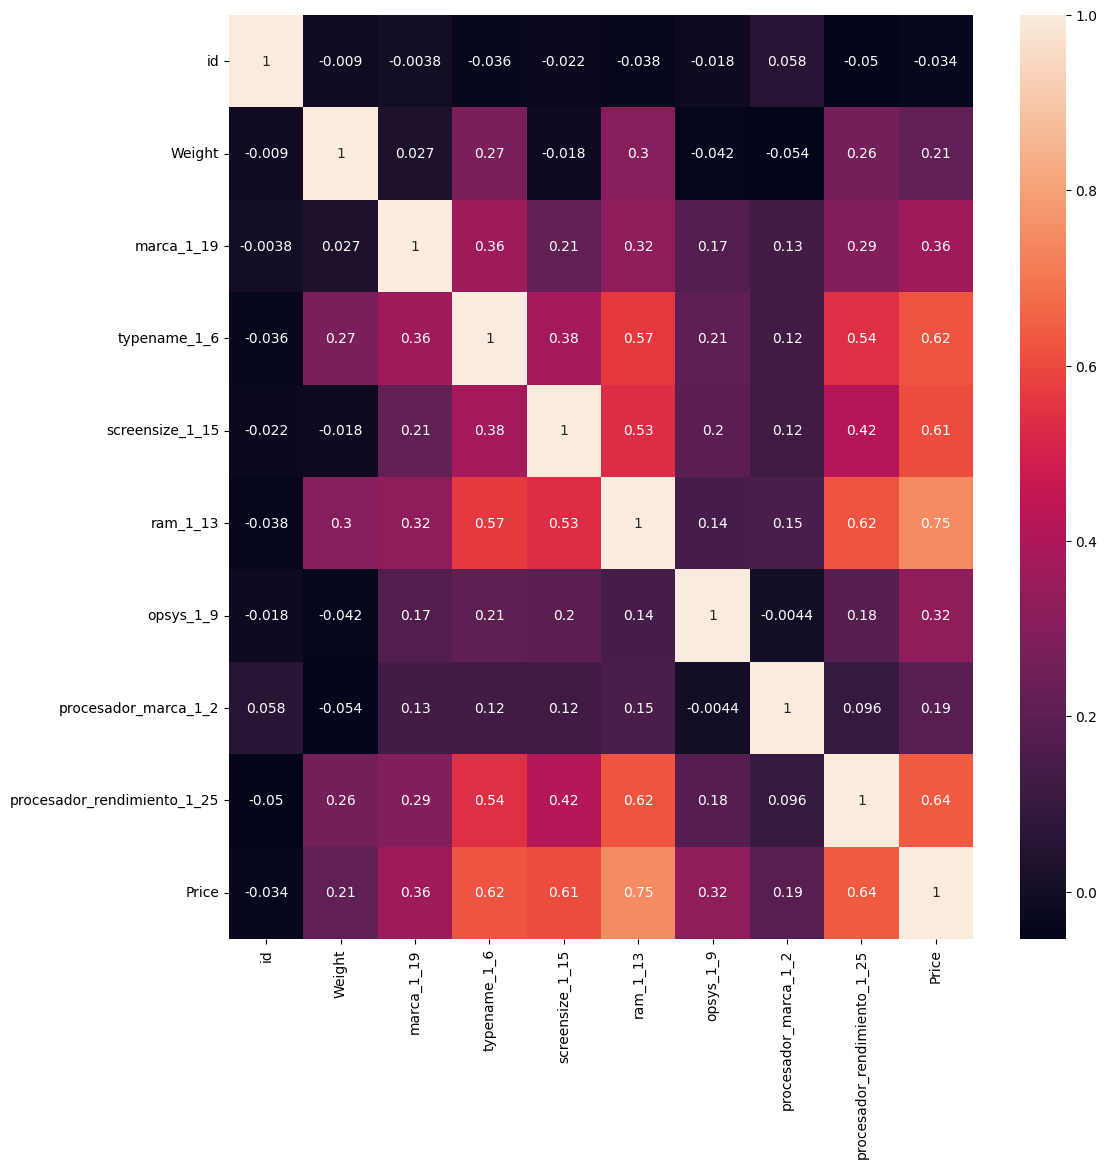

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

In [16]:
X=data.copy()
X.drop(columns={"Price"},inplace=True)
Y=data["Price"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(729, 9)
(183, 9)
(729,)
(183,)


In [20]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)
print(linear_model.intercept_,linear_model.coef_)

-1624.6959358978022 [3.73690672e-02 3.73014523e+01 8.87878371e+00 9.75212896e+01
 6.90299226e+01 1.74779143e+02 1.06738452e+02 2.21852464e+02
 2.04663319e+01]


In [21]:
linear_model.score(X_train,Y_train)


0.7163560033464835

In [22]:
predictions_lm_train=linear_model.predict(X_train)
predictions_lm_test=linear_model.predict(X_test)

#Vemos las métricas de los errores
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
print("Training Errors:")
print("MAE:",mean_absolute_error(Y_train,predictions_lm_train))  
print("MSE:",mean_squared_error(Y_train,predictions_lm_train))
print("R2:",r2_score(Y_train,predictions_lm_train))  #Cómo de bien se ajusta el modelo a los datos de entrenamiento utilizados
print("MAPE:",mean_absolute_percentage_error(Y_train,predictions_lm_train))
print("-"*20)
print("Test Errors:")
print("MAE:",mean_absolute_error(Y_test,predictions_lm_test))
print("R2:",r2_score(Y_test,predictions_lm_test)) 
print("MSE:",mean_squared_error(Y_test,predictions_lm_test))
print("MAPE:",mean_absolute_percentage_error(Y_test,predictions_lm_test))

Training Errors:
MAE: 270.42803519338815
MSE: 139674.8582650765
R2: 0.7163560033464835
MAPE: 0.27443040253293977
--------------------
Test Errors:
MAE: 299.67584846673594
R2: 0.681976739034819
MSE: 142927.77055300877
MAPE: 0.321352902424705


In [24]:
predictions_linear_model=linear_model.predict(Z_test)

In [25]:
diccionario = {'id': Z_test['id'], 'Price_euros': np.array(predictions_linear_model)}


entrega_linear_model = pd.DataFrame(diccionario)


entrega_linear_model

,id,Price_euros
0,824,1207.427621
1,101,721.802777
2,1157,1667.945207
3,940,1214.860203
4,853,1075.740874
...,...,...
386,292,1059.183008
387,688,1164.163012
388,910,1325.829130
389,54,415.645420


In [ ]:
entrega_linear_model.to_csv("entrega_linear_model2.csv",index=False)